<a href="https://colab.research.google.com/github/ghosh-rupanjan/Mathematical-Aspects-of-Data-Visualisation-and-Optimisation-Methods/blob/main/DataVisualisation_PARTB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.optimize import linear_sum_assignment

# Task 2

In [ ]:
#Importing  already made DTW dataset made in Q1_PARTA
dtw_matrix = pd.read_csv('/content/DRW Similarity',sep = ",");
dtw_matrix.drop(dtw_matrix.columns[0], axis = 1, inplace = True)
dtw_matrix

,0,1,2,3,4,5,6,7,8,9,...,7342,7343,7344,7345,7346,7347,7348,7349,7350,7351
0,0.000000,0.155573,0.236379,0.242262,0.207211,0.193491,0.205443,0.254557,0.199198,0.268221,...,25.269609,25.609199,28.045140,25.486962,26.449111,26.890526,25.907907,26.619419,26.274568,23.199901
1,0.155126,0.000000,0.221710,0.242907,0.192990,0.227024,0.218986,0.256957,0.199647,0.286172,...,25.274173,25.661432,28.049225,25.525371,26.400268,26.872091,25.815862,26.620147,26.233849,23.328924
2,0.229164,0.221710,0.000000,0.173542,0.233368,0.242828,0.230450,0.232033,0.201004,0.259739,...,25.454557,25.606774,28.055573,25.631692,26.397580,26.768468,25.689015,26.565028,26.264284,23.337989
3,0.248184,0.242653,0.173542,0.000000,0.257206,0.205060,0.254495,0.205664,0.240593,0.286184,...,25.143845,25.687643,28.076052,25.514837,26.535317,26.897689,25.768708,26.670914,26.321671,23.380678
4,0.180395,0.192990,0.262123,0.257206,0.000000,0.181865,0.169365,0.238795,0.179710,0.193981,...,25.296626,25.634697,28.115981,25.568355,26.444197,26.991893,25.926712,26.659906,26.335510,23.215344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,26.894984,26.857348,26.764067,26.888318,26.986417,26.877472,26.962937,26.931331,26.969659,26.915777,...,15.491882,13.982818,11.866774,8.890267,9.338560,0.000000,7.051417,10.158753,9.628636,10.512278
7348,25.906971,25.811919,25.726856,25.768201,25.928618,25.868004,25.906613,25.901067,25.958108,25.760368,...,12.910589,11.153626,10.756449,8.154284,7.370357,7.066591,0.000000,9.823466,9.178891,10.818802
7349,26.609519,26.639212,26.575770,26.670914,26.653753,26.573763,26.676562,26.698963,26.685260,26.702358,...,19.730927,13.445911,11.863690,9.769917,9.032642,10.130064,9.823466,0.000000,5.405863,6.323372
7350,26.418272,26.237665,26.445178,26.475522,26.387053,26.264294,26.441971,26.384607,26.514512,26.579359,...,11.741578,12.916476,11.361708,9.110944,9.337455,9.488703,9.150203,5.405863,0.000000,6.058140


In [ ]:
#Calculating Kernel Matrix
e = np.median(dtw_matrix)
K = np.exp(-(dtw_matrix**2)/e)
K

,0,1,2,3,4,5,6,7,8,9,...,7342,7343,7344,7345,7346,7347,7348,7349,7350,7351
0,1.000000e+00,9.991515e-01,9.980422e-01,9.979436e-01,9.984952e-01,9.986878e-01,9.985208e-01,9.977299e-01,9.986093e-01,9.974799e-01,...,1.877057e-10,1.023996e-10,1.045870e-12,1.274780e-10,2.209442e-11,9.674827e-12,5.968948e-11,1.609219e-11,3.051102e-11,6.331846e-09
1,9.991564e-01,1.000000e+00,9.982774e-01,9.979327e-01,9.986945e-01,9.981940e-01,9.983195e-01,9.976869e-01,9.986030e-01,9.971318e-01,...,1.861932e-10,9.321937e-11,1.037498e-12,1.190121e-10,2.418811e-11,1.001705e-11,7.053694e-11,1.607033e-11,3.288701e-11,5.129642e-09
2,9.981598e-01,9.982774e-01,1.000000e+00,9.989443e-01,9.980917e-01,9.979340e-01,9.981391e-01,9.981135e-01,9.985840e-01,9.976366e-01,...,1.350766e-10,1.028466e-10,1.024619e-12,9.834266e-11,2.430880e-11,1.217324e-11,8.870166e-11,1.781054e-11,3.109473e-11,5.054094e-09
3,9.978420e-01,9.979370e-01,9.989443e-01,1.000000e+00,9.976824e-01,9.985263e-01,9.977310e-01,9.985176e-01,9.979718e-01,9.971316e-01,...,2.344511e-10,8.892115e-11,9.841306e-13,1.212775e-10,1.882388e-11,9.544968e-12,7.681881e-11,1.461555e-11,2.797178e-11,4.712646e-09
4,9.988593e-01,9.986945e-01,9.975931e-01,9.976824e-01,1.000000e+00,9.988406e-01,9.989944e-01,9.980020e-01,9.988679e-01,9.986811e-01,...,1.789238e-10,9.781276e-11,9.096546e-13,1.101888e-10,2.229677e-11,7.988162e-12,5.768332e-11,1.491961e-11,2.726591e-11,6.174647e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,9.593805e-12,1.029926e-11,1.227424e-11,9.715204e-12,8.071407e-12,9.915952e-12,8.438092e-12,8.957574e-12,8.331478e-12,9.224607e-12,...,2.209602e-04,1.051542e-03,7.161549e-03,6.253176e-02,4.694898e-02,1.000000e+00,1.748320e-01,2.679419e-02,3.870971e-02,2.073616e-02
7348,5.979110e-11,7.104237e-11,8.285061e-11,7.688924e-11,5.748371e-11,6.417525e-11,5.983001e-11,6.043599e-11,5.448005e-11,7.798545e-11,...,2.891070e-03,1.273714e-02,1.728322e-02,9.709127e-02,1.487846e-01,1.735233e-01,1.000000e+00,3.389163e-02,5.207897e-02,1.648668e-02
7349,1.639238e-11,1.550806e-11,1.745750e-11,1.461555e-11,1.509223e-11,1.752297e-11,1.446191e-11,1.386796e-11,1.422837e-11,1.378008e-11,...,1.174867e-06,1.762566e-03,7.179953e-03,3.516204e-02,5.717839e-02,2.734680e-02,3.389163e-02,1.000000e+00,3.588114e-01,2.460044e-01
7350,2.339466e-11,3.265686e-11,2.225621e-11,2.103736e-11,2.478720e-11,3.109416e-11,2.238903e-11,2.489968e-11,1.956683e-11,1.734110e-11,...,7.943795e-03,2.875694e-03,1.080710e-02,5.439911e-02,4.698297e-02,4.251753e-02,5.304834e-02,3.588114e-01,1.000000e+00,2.760354e-01


In [ ]:
#D = pd.DataFrame(0, index = np.arange(K.shape[0]), columns = np.arange(K.shape[0]))
#for i in range (0, K.shape[0]):
#  D[i,i] = K.iloc[i,:].sum()
#D
print(e)

28.51174344999999


In [ ]:
D = pd.DataFrame(np.diag(K.sum(axis=1)), index=K.index, columns=K.columns)
D

,0,1,2,3,4,5,6,7,8,9,...,7342,7343,7344,7345,7346,7347,7348,7349,7350,7351
0,1724.859631,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,1724.562465,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,1721.02322,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.00000,1710.019223,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.00000,0.000000,1709.895182,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.280595,0.000000,0.000000,0.000000,0.000000
7348,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,15.918571,0.000000,0.000000,0.000000
7349,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,35.061902,0.000000,0.000000
7350,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,28.288912,0.000000


In [ ]:

L = D - K

L

,0,1,2,3,4,5,6,7,8,9,...,7342,7343,7344,7345,7346,7347,7348,7349,7350,7351
0,1.723860e+03,-9.991515e-01,-9.980422e-01,-9.979436e-01,-9.984952e-01,-9.986878e-01,-9.985208e-01,-9.977299e-01,-9.986093e-01,-9.974799e-01,...,-1.877057e-10,-1.023996e-10,-1.045870e-12,-1.274780e-10,-2.209442e-11,-9.674827e-12,-5.968948e-11,-1.609219e-11,-3.051102e-11,-6.331846e-09
1,-9.991564e-01,1.723562e+03,-9.982774e-01,-9.979327e-01,-9.986945e-01,-9.981940e-01,-9.983195e-01,-9.976869e-01,-9.986030e-01,-9.971318e-01,...,-1.861932e-10,-9.321937e-11,-1.037498e-12,-1.190121e-10,-2.418811e-11,-1.001705e-11,-7.053694e-11,-1.607033e-11,-3.288701e-11,-5.129642e-09
2,-9.981598e-01,-9.982774e-01,1.720023e+03,-9.989443e-01,-9.980917e-01,-9.979340e-01,-9.981391e-01,-9.981135e-01,-9.985840e-01,-9.976366e-01,...,-1.350766e-10,-1.028466e-10,-1.024619e-12,-9.834266e-11,-2.430880e-11,-1.217324e-11,-8.870166e-11,-1.781054e-11,-3.109473e-11,-5.054094e-09
3,-9.978420e-01,-9.979370e-01,-9.989443e-01,1.709019e+03,-9.976824e-01,-9.985263e-01,-9.977310e-01,-9.985176e-01,-9.979718e-01,-9.971316e-01,...,-2.344511e-10,-8.892115e-11,-9.841306e-13,-1.212775e-10,-1.882388e-11,-9.544968e-12,-7.681881e-11,-1.461555e-11,-2.797178e-11,-4.712646e-09
4,-9.988593e-01,-9.986945e-01,-9.975931e-01,-9.976824e-01,1.708895e+03,-9.988406e-01,-9.989944e-01,-9.980020e-01,-9.988679e-01,-9.986811e-01,...,-1.789238e-10,-9.781276e-11,-9.096546e-13,-1.101888e-10,-2.229677e-11,-7.988162e-12,-5.768332e-11,-1.491961e-11,-2.726591e-11,-6.174647e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,-9.593805e-12,-1.029926e-11,-1.227424e-11,-9.715204e-12,-8.071407e-12,-9.915952e-12,-8.438092e-12,-8.957574e-12,-8.331478e-12,-9.224607e-12,...,-2.209602e-04,-1.051542e-03,-7.161549e-03,-6.253176e-02,-4.694898e-02,1.028059e+01,-1.748320e-01,-2.679419e-02,-3.870971e-02,-2.073616e-02
7348,-5.979110e-11,-7.104237e-11,-8.285061e-11,-7.688924e-11,-5.748371e-11,-6.417525e-11,-5.983001e-11,-6.043599e-11,-5.448005e-11,-7.798545e-11,...,-2.891070e-03,-1.273714e-02,-1.728322e-02,-9.709127e-02,-1.487846e-01,-1.735233e-01,1.491857e+01,-3.389163e-02,-5.207897e-02,-1.648668e-02
7349,-1.639238e-11,-1.550806e-11,-1.745750e-11,-1.461555e-11,-1.509223e-11,-1.752297e-11,-1.446191e-11,-1.386796e-11,-1.422837e-11,-1.378008e-11,...,-1.174867e-06,-1.762566e-03,-7.179953e-03,-3.516204e-02,-5.717839e-02,-2.734680e-02,-3.389163e-02,3.406190e+01,-3.588114e-01,-2.460044e-01
7350,-2.339466e-11,-3.265686e-11,-2.225621e-11,-2.103736e-11,-2.478720e-11,-3.109416e-11,-2.238903e-11,-2.489968e-11,-1.956683e-11,-1.734110e-11,...,-7.943795e-03,-2.875694e-03,-1.080710e-02,-5.439911e-02,-4.698297e-02,-4.251753e-02,-5.304834e-02,-3.588114e-01,2.728891e+01,-2.760354e-01


In [ ]:
#Computing Laplacian
D_inv_sqrt = np.diag(1 / np.sqrt(D.values.diagonal()))
Laplacian = D_inv_sqrt@L@D_inv_sqrt
Laplacian

        0    1    2    3    4    5    6    7    8    9  ...  7342  7343  7344  \
0     1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
1     0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
2     0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
3     0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
4     0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
7347  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
7348  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
7349  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
7350  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
7351  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   

      7345  7346  7347  734

,0,1,2,3,4,5,6,7,8,9,...,7342,7343,7344,7345,7346,7347,7348,7349,7350,7351
0,9.994202e-01,-5.793153e-04,-5.792668e-04,-5.810702e-04,-5.814125e-04,-5.811695e-04,-5.825118e-04,-5.820154e-04,-5.826463e-04,-5.831702e-04,...,-1.201554e-12,-4.131653e-13,-4.876665e-15,-5.403563e-13,-9.002436e-14,-6.935860e-14,-3.602209e-13,-6.543656e-14,-1.381248e-13,-2.704840e-11
1,-5.793181e-04,9.994201e-01,-5.794533e-04,-5.811139e-04,-5.815787e-04,-5.809322e-04,-5.824446e-04,-5.820405e-04,-5.826928e-04,-5.830169e-04,...,-1.191974e-12,-3.761571e-13,-4.838046e-15,-5.045141e-13,-9.856363e-14,-7.181820e-14,-4.257211e-13,-6.535330e-14,-1.488939e-13,-2.191471e-11
2,-5.793351e-04,-5.794533e-04,9.994190e-01,-5.823008e-04,-5.818249e-04,-5.813778e-04,-5.829378e-04,-5.828878e-04,-5.832805e-04,-5.839115e-04,...,-8.656246e-13,-4.154312e-13,-4.782898e-15,-4.173211e-13,-9.915721e-14,-8.736687e-14,-5.359032e-13,-7.250467e-14,-1.409241e-13,-2.161414e-11
3,-5.810111e-04,-5.811164e-04,-5.823008e-04,9.994152e-01,-5.834546e-04,-5.835915e-04,-5.845713e-04,-5.849970e-04,-5.847955e-04,-5.854907e-04,...,-1.507282e-12,-3.603356e-13,-4.608657e-15,-5.162992e-13,-7.703052e-14,-6.872393e-14,-4.656022e-13,-5.968938e-14,-1.271778e-13,-2.021866e-11
4,-5.816245e-04,-5.815787e-04,-5.815343e-04,-5.834546e-04,9.994152e-01,-5.837964e-04,-5.853328e-04,-5.847161e-04,-5.853418e-04,-5.864218e-04,...,-1.150340e-12,-3.963815e-13,-4.260042e-15,-4.691098e-13,-9.124551e-14,-5.751698e-14,-3.496339e-13,-6.093335e-14,-1.239730e-13,-2.649204e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,-6.877776e-14,-7.384148e-14,-8.809179e-14,-6.994963e-14,-5.811637e-14,-7.135402e-14,-6.086993e-14,-6.461343e-14,-6.010939e-14,-6.668834e-14,...,-1.749004e-05,-5.246423e-05,-4.129173e-04,-3.277604e-03,-2.365453e-03,9.113522e-01,-1.304677e-02,-1.347277e-03,-2.166935e-03,-1.095344e-03
7348,-3.608341e-13,-4.287715e-13,-5.005533e-13,-4.660291e-13,-3.484240e-13,-3.887456e-13,-3.633219e-13,-3.669797e-13,-3.308809e-13,-4.746020e-13,...,-1.926412e-04,-5.349616e-04,-8.388701e-04,-4.284004e-03,-6.310449e-03,-1.294910e-02,9.371803e-01,-1.434573e-03,-2.454156e-03,-7.331103e-04
7349,-6.665724e-14,-6.306671e-14,-7.106748e-14,-5.968938e-14,-6.163835e-14,-7.152204e-14,-5.917422e-14,-5.674049e-14,-5.822689e-14,-5.650696e-14,...,-5.274894e-08,-4.988045e-05,-2.348151e-04,-1.045389e-03,-1.634062e-03,-1.375064e-03,-1.434573e-03,9.714790e-01,-1.139306e-02,-7.370775e-03
7350,-1.059087e-13,-1.478519e-13,-1.008671e-13,-9.564950e-14,-1.127028e-13,-1.412930e-13,-1.019886e-13,-1.134185e-13,-8.914533e-14,-7.916560e-14,...,-3.970659e-04,-9.060188e-05,-3.934804e-04,-1.800551e-03,-1.494812e-03,-2.380093e-03,-2.499837e-03,-1.139306e-02,9.646505e-01,-9.207562e-03


In [ ]:
#Finding eigenvectors and eigenvalues of laplacian
L_np = Laplacian.values

eg_val,eg_vec = np.linalg.eig(L_np)

In [ ]:
print(eg_val[5000:7351].real.sum())

2350.9928471651865


In [ ]:
eg_val.real

array([0.02987265, 0.02835364, 0.02727562, ..., 0.99999738, 0.99999742,
       0.99999829])

In [ ]:
#Sorting eigenvalues to take top 2 leading eigenectors

sort = np.argsort(eg_val)[::-1]

t = 3
t_eigenvalues = eg_val[sort][:t]
t_eigenvectors = eg_vec[:, sort][:, :t]

In [ ]:
eg_val.real
#top_eigenvectors = eg_vec


array([0.02987265, 0.02835364, 0.02727562, ..., 0.99999738, 0.99999742,
       0.99999829])

In [ ]:
t_eigenvectors[:,1],t_eigenvectors[:,2]

(array([ 3.05368680e-15+0.j,  2.71397343e-16+0.j, -5.86073248e-16+0.j, ...,
        -5.92624310e-16+0.j,  6.19560883e-18+0.j, -1.84935550e-15+0.j]),
 array([ 6.32043525e-15+0.j,  1.71867285e-16+0.j,  2.80342226e-16+0.j, ...,
        -1.19737867e-15+0.j,  2.14001825e-15+0.j, -2.39989955e-15+0.j]))

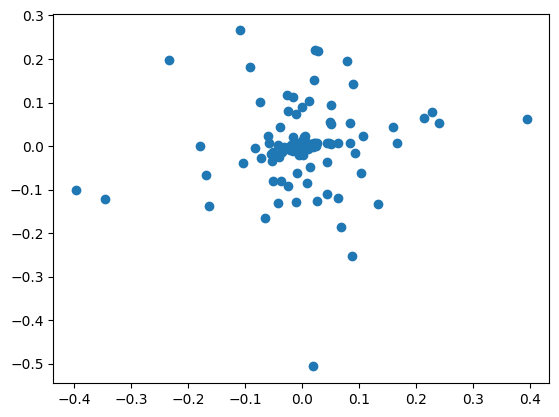

In [ ]:
plt.scatter(t_eigenvectors[:,1],t_eigenvectors[:,2])

# Task 3

In [ ]:
#Loading the actual labels
act = np.loadtxt("/content/y_train.txt", dtype = np.int32)

[5. 5. 5. ... 2. 2. 2.]


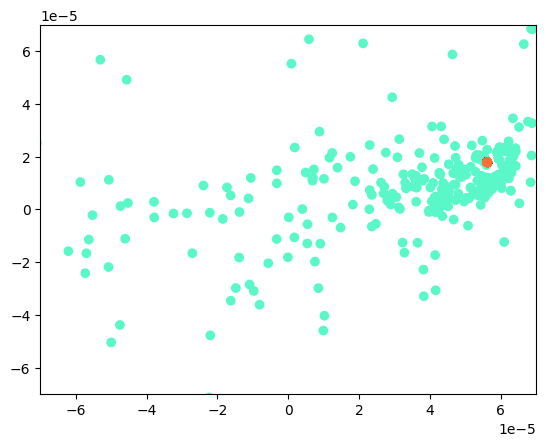

[0 0 0 ... 5 5 5]


In [ ]:
#Data scaled, with ist and 2nd columns being eigenvectors and 3rd column being the data labels
scaler = StandardScaler()
scaled_data = scaler.fit_transform(t_eigenvectors[:, [0, 1]].real)
scaled_data = np.column_stack((scaled_data,act))
scaled_data[:,2] = scaled_data[:,2].real
print(scaled_data[:,2])

plt.scatter(scaled_data[:,0],scaled_data[:,1],c = db_lbl, cmap = "rainbow")
plt.xlim(-7*10**-5,7*10**-5)
plt.ylim(-7*10**-5,7*10**-5)

plt.show()
print(db_lbl)
#print(np.bincount(db_lbl))

In [ ]:
#data concentrated in one region which is taken from scaled_data to scaled_data_1,4*10**-5 < x < 6*10**-5 and -1.5*10**-5 < y < 3*10**-5, scaled_data_1 removes the potential outliers, determined from the graph
scaled_data_1 = []
for (x, y, z) in zip(scaled_data[:,0],scaled_data[:,1],scaled_data[:,2]):
  if 4*10**-5 < x < 6*10**-5 and -1.5*10**-5 < y < 3*10**-5:
    scaled_data_1.append([x,y,z])
scaled_data_1 = np.array(scaled_data_1)
print(scaled_data_1.shape)
scaled_data_1[:,2] = scaled_data_1[:,2].real


(6061, 3)


1


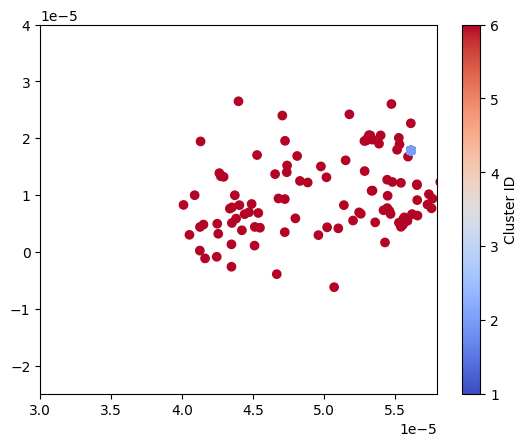

[6061]


In [ ]:
#DBScan tried but not used since it does not mak ethe desired number of clusters
db = DBSCAN(eps = 1, min_samples = 1000)
db_lbl = db.fit(scaled_data_1[:,(0,1)]).labels_
#print(km_lbl[0:2000])

n_clusters = len(np.unique(db_lbl))
print(n_clusters)# Get the number of clusters (including noise)
colors = plt.cm.get_cmap('viridis', n_clusters)

scatter = plt.scatter(scaled_data_1[:,0],scaled_data_1[:,1],c = scaled_data_1[:,2],cmap = 'coolwarm')
plt.xlim(3*10**-5,5.8*10**-5)
plt.ylim(-2.5*10**-5,4*10**-5)
plt.colorbar(scatter,label = "Cluster ID")
plt.show()
print(np.bincount(db_lbl))
#print(scaled_data[1000:2000])

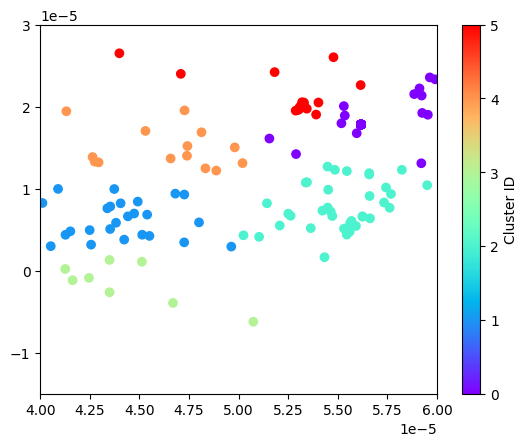

[5959   25   36    8   14   19]


In [ ]:
#KMeans used to cluster data
k = 6;
km = KMeans(n_clusters=k,n_init=20, random_state=42)
km_lbl = km.fit_predict(scaled_data_1[:, [0, 1]].real)
#print(km_lbl[0:2000])

scatter = plt.scatter(scaled_data_1[:,0],scaled_data_1[:,1],c = km_lbl, cmap = "rainbow")
plt.colorbar(scatter,label = "Cluster ID")
plt.xlim(4*10**-5,6*10**-5)
plt.ylim(-1.5*10**-5,3*10**-5)
plt.show()
print(np.bincount(km_lbl))

In [ ]:
#Wasnt required as ari score equated predicted labels to actual labels, intended to equate predicted labels and actual labels for ARI score calculation
n1 = len(np.unique(act))
n2 = len(np.unique(db_lbl))
c_matrix = np.zeros((n1, n2), dtype=int)

for t_lbl, p_lbl in zip(act, db_lbl):
    c_matrix[t_lbl-1][p_lbl] += 1
c_matrix

r_idx, c_idx = linear_sum_assignment(-c_matrix)
print(r_idx+1,c_idx)

db_lbl_1 = db_lbl
for i in range (0,len(db_lbl_1)):
  if db_lbl_1[i] == 0:
    db_lbl_1[i] = 2
  elif db_lbl_1[i] == 1:
    db_lbl_1[i] = 5
  elif db_lbl_1[i] == 2:
    db_lbl_1[i] = 4
  elif db_lbl_1[i] == 3:
    db_lbl_1[i] = 6
  elif db_lbl_1[i] == 4:
    db_lbl_1[i] = 1
  elif db_lbl_1[i] == 5:
    db_lbl_1[i] = 3
print(np.unique(db_lbl_1))

[6] [0]
[2]


In [ ]:
#ARI SCORE CALCULATION
ari_score = adjusted_rand_score(km_lbl,scaled_data_1[:,2])
print("ARI SCORE FOR DIFFUSION MAPS IS: "+str(ari_score))

ARI SCORE FOR DIFFUSION MAPS IS: 0.015850152389575614


In [ ]:
#SILHOUETTE SCORE CALCULATION
sil_score = silhouette_score(scaled_data_1[:,(0,1)],km_lbl)
print("SILHOUETTE SCORE FOR DIFFUSION MAPS IS: "+str(sil_score))

SILHOUETTE SCORE FOR DIFFUSION MAPS IS: 0.9868247545517055


## TASK 4

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
#importing raw data
data = pd.read_csv("/content/total_acc_x_train.txt",sep =" ",on_bad_lines='warn',skipinitialspace=True, header = None)
data

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,1.012817,1.022833,1.022028,1.017877,1.023680,1.016974,1.017746,1.019263,1.016417,1.020745,...,1.020981,1.018065,1.019638,1.020017,1.018766,1.019815,1.019290,1.018445,1.019372,1.021171
1,1.018851,1.022380,1.020781,1.020218,1.021344,1.020522,1.019790,1.019216,1.018307,1.017996,...,1.019291,1.019258,1.020736,1.020950,1.020491,1.018685,1.015660,1.014788,1.016499,1.017849
2,1.023127,1.021882,1.019178,1.015861,1.012893,1.016451,1.020331,1.020266,1.021759,1.018649,...,1.020304,1.021516,1.019417,1.019312,1.019448,1.019434,1.019916,1.021041,1.022935,1.022019
3,1.017682,1.018149,1.019854,1.019880,1.019121,1.020479,1.020595,1.016340,1.010611,1.009013,...,1.021295,1.022934,1.022183,1.021637,1.020598,1.018887,1.019161,1.019916,1.019602,1.020735
4,1.019952,1.019616,1.020933,1.023061,1.022242,1.020867,1.021939,1.022300,1.022302,1.022254,...,1.022687,1.023670,1.019899,1.017381,1.020389,1.023884,1.021753,1.019425,1.018896,1.016787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,1.374753,1.604501,1.759656,1.572037,1.202413,0.958087,0.814209,0.766668,0.848179,1.019196,...,0.746457,0.728023,0.748200,0.765749,0.798177,0.836157,0.847159,0.825709,0.803503,0.769958
7348,1.713028,1.709944,1.321608,0.970870,0.791258,0.806160,0.931817,0.955901,1.055893,1.104281,...,0.674550,0.670934,0.713923,0.662663,0.610054,0.607774,0.619825,0.696206,0.788222,0.867896
7349,0.754892,0.804314,0.831714,0.850725,0.914926,0.991363,1.080123,1.189563,1.425107,1.646699,...,0.807177,0.736686,0.672145,0.619913,0.592795,0.641516,0.669835,0.695626,0.747910,0.776768
7350,0.927927,0.912987,0.924660,0.954527,0.964228,1.011060,1.070035,1.245714,1.499556,1.575337,...,0.743487,0.654212,0.589173,0.573030,0.608761,0.632124,0.671960,0.675347,0.660338,0.719353


In [ ]:
#Evaluating PCA scores
pca = PCA(n_components = 2)
pca_fit = pca.fit_transform(data)
pca_1 = KMeans(n_clusters=6, n_init = 20, random_state = 42)
pca_lbl = pca_1.fit_predict(pca_fit)
ari_score_pca = adjusted_rand_score(act, pca_lbl)
print("ARI SCORE FOR PCA IS: "+str(ari_score_pca))
sil_score_pca = silhouette_score(pca_fit,pca_lbl)
print("SIL SCORE FOR PCA IS: "+str(sil_score_pca))

ARI SCORE FOR PCA IS: 0.2370413676276536
SIL SCORE FOR PCA IS: 0.5818364918020944


In [ ]:
#Evaluating TSNE scores
tsne = TSNE(n_components = 2)
tsne_fit = tsne.fit_transform(data)
tsne_1 = KMeans(n_clusters = 6, n_init = 20, random_state = 42)
tsne_lbl = tsne_1.fit_predict(tsne_fit)
ari_score_tsne = adjusted_rand_score(act, tsne_lbl)
print("ARI SCORE FOR TSNE IS: "+str(ari_score_tsne))
sil_score_tsne = silhouette_score(tsne_fit,tsne_lbl)
print("SILHOUETTE SCORE FOR TSNE IS: "+str(sil_score_tsne))

ARI SCORE FOR TSNE IS: 0.21193052729932066
SILHOUETTE SCORE FOR TSNE IS: 0.37957898


In [ ]:
#Evaluating RAW scores
data_1 = data.to_numpy()
eg_val_raw,eg_vec_raw = np.linalg.eig(data_1@data_1.T)
sort_raw = np.argsort(eg_val_raw)[::-1]


t_raw = 2
t_eigenvalues_raw = eg_val_raw[sort_raw][:t_raw]
t_eigenvectors_raw = eg_vec_raw[:, sort_raw][:, :t_raw]

vec = t_eigenvectors_raw[:,(0,1)].real


km_raw = KMeans(n_clusters=k,n_init=20, random_state=42)
km_lbl_raw = km_raw.fit_predict(vec[:, [0, 1]].real)
ari_score_raw = adjusted_rand_score(act, km_lbl_raw)
print("ARI SCORE FOR RAW DATA IS: "+str(ari_score_raw))
sil_score_raw = silhouette_score(vec,km_lbl_raw)
print("SILHOUETTE SCORE FOR RAW DATA IS: "+str(sil_score_tsne))

ARI SCORE FOR RAW DATA IS: 0.35017191529631336
SILHOUETTE SCORE FOR RAW DATA IS: 0.37957898


In [ ]:
t_raw = 10
t_eigenvalues_raw = eg_val_raw[sort_raw][:t_raw]
t_eigenvectors_raw = eg_vec_raw[:, sort_raw][:, :t_raw]
t_eigenvalues_raw

array([7.35588895e+05+0.j, 7.48086468e+03+0.j, 7.32234988e+03+0.j,
       3.19664439e+03+0.j, 2.70042314e+03+0.j, 1.19614786e+03+0.j,
       1.11380615e+03+0.j, 7.99862134e+02+0.j, 7.70901178e+02+0.j,
       7.28613526e+02+0.j])